In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'train.csv'
df = pd.read_csv(archivo)
archivo2 = "IBM HR Data new.csv"
df2 = pd.read_csv(archivo2)


C:\Users\fchia\AppData\Local\Temp\ipykernel_20984\759001633.py:8: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(archivo2)


## Problema: Deserción laboral
### La problemática a analizar se centra en la deserción de empleados en las empresas.
### Este estudio se lleva a cabo con el objetivo de encontrar las razones de dichas renuncias y encontrar una posible solución para poder evitar estos acontecimiento. Se analizarán diferentes variables y situaciones para determinar un partrón o similitudes. Utilizaremos dos dataset diferentes por lo que primero deberemos realizar una etapa de limpieza de datos y variables. Esto nos permitirá contar con mayores casos pero para esto deben concidir las columnas y los tipos de datos que contienen.

## Limpieza

In [2]:
df = df.rename(columns={'Employee ID' : 'ID Empleado',
                        'Age' : 'Edad',
                        'Gender' : 'Género',
                        'Years at Company' : 'Antigüedad en la Empresa', 
                        'Job Role' : 'Rol de Trabajo', 
                        'Monthly Income' : 'Ingreso Mensual',
                        'Work-Life Balance' : 'Balance Trabajo-Vida',
                        'Job Satisfaction' : 'Satisfacción del Trabajo',
                        'Performance Rating' : 'Desempeño',
                        'Number of Promotions' : 'Número de Promociones',
                        'Overtime' : 'Horas Extras',
                        'Distance from Home' : 'Distancia a Casa',
                        'Education Level' : 'Nivel de Educación',
                        'Marital Status' : 'Estado Civil',
                        'Number of Dependents' : 'Número de Dependientes',
                        'Job Level' : 'Nivel de Trabajo',
                        'Company Size' : 'Tamaño de Empresa',
                        'Company Tenure' : 'Antigüeadad en el Rubro',
                        'Remote Work' : 'Trabajo Remoto',
                        'Leadership Opportunities' : 'Oportunidades de Liderazgo',
                        'Innovation Opportunities' : 'Oportunidades de Innovación',
                        'Company Reputation' : 'Reputación de la Empresa',
                        'Employee Recognition' : 'Reconocimiento a Empleado',
                        'Attrition' : 'Deserción'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID Empleado                  59598 non-null  int64 
 1   Edad                         59598 non-null  int64 
 2   Género                       59598 non-null  object
 3   Antigüedad en la Empresa     59598 non-null  int64 
 4   Rol de Trabajo               59598 non-null  object
 5   Ingreso Mensual              59598 non-null  int64 
 6   Balance Trabajo-Vida         59598 non-null  object
 7   Satisfacción del Trabajo     59598 non-null  object
 8   Desempeño                    59598 non-null  object
 9   Número de Promociones        59598 non-null  int64 
 10  Horas Extras                 59598 non-null  object
 11  Distancia a Casa             59598 non-null  int64 
 12  Nivel de Educación           59598 non-null  object
 13  Estado Civil                 59

### CARACTERÍSTICAS:
* ID Empleado: Un identificador único asignado a cada empleado.
* Edad: La edad del empleado, que varía entre 18 y 60 años.
* Género: El género del empleado.
* Antigüedad en la Empresa: El número de años que el empleado ha trabajado en la empresa.
* Ingreso Mensual: El salario mensual del empleado, en dólares.
* Rol de Trabajo: El departamento o rol en el que trabaja el empleado, codificado en categorías como Finanzas, Salud, Tecnología, Educación y Medios.
* Balance Trabajo-Vida: La percepción del empleado sobre el equilibrio entre el trabajo y la vida personal: (Malo, Por debajo del promedio, Bueno, Excelente).
* Satisfacción Laboral: La satisfacción del empleado con su trabajo: (Muy Baja, Baja, Media, Alta).
* Desempeño: La calificación del desempeño del empleado: (Baja, Por debajo del promedio, Promedio, Alta).
* Número de Promociones: El número total de promociones que ha recibido el empleado.
* Distancia a Casa: La distancia entre la casa del empleado y el lugar de trabajo, en millas.
* Nivel de Educación: El nivel educativo más alto alcanzado por el empleado: (Secundaria, Grado Asociado, Licenciatura, Maestría, Doctorado).
* Estado Civil: El estado civil del empleado: (Divorciado, Casado, Soltero).
* Número de Dependientes: El número de empleados dependientes.
* Nivel de Trabajo: El nivel de trabajo del empleado: (Junior, Medio, Senior).
* Tamaño de la Empresa: El tamaño de la empresa en la que trabaja el empleado: (Pequeña, Mediana, Grande).
* Antigüedad en el Rubro: El número total de años que el empleado ha trabajado en la industria.
* Trabajo Remoto: Si el empleado trabaja de forma remota: (Sí o No).
* Oportunidades de Liderazgo: Si el empleado tiene oportunidades de liderazgo: (Sí o No).
* Oportunidades de Innovación: Si el empleado tiene oportunidades de innovación: (Sí o No).
* Reputación de la Empresa: La percepción del empleado sobre la reputación de la empresa: (Muy Mala, Mala, Buena, Excelente).
* Reconocimiento a Empleado: El nivel de reconocimiento que recibe el empleado: (Muy Bajo, Bajo, Medio, Alto).
* Deserción: Si el empleado ha dejado la empresa, codificado como 0 (se quedó) y 1 (se fue).

In [4]:
empleadosmenores= df[(df["Edad"] - df["Antigüedad en la Empresa"]) < 16]
empleadosmenores

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Antigüeadad en el Rubro,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
12,21896,47,Female,38,Technology,9039,Fair,Very High,High,1,...,0,Entry,Small,68,No,No,No,Good,Low,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,16024,23,Male,10,Healthcare,8143,Fair,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,Medium,Left
59592,44132,38,Male,23,Finance,10351,Excellent,Medium,Below Average,2,...,4,Entry,Small,54,No,No,No,Poor,Medium,Stayed
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed


In [6]:
df = df.drop(empleadosmenores.index)
df

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Antigüeadad en el Rubro,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59585,59736,56,Male,16,Technology,11048,Good,Low,Average,1,...,2,Entry,Medium,25,No,No,No,Good,Medium,Left
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left


In [7]:
salud = df[(df["Rol de Trabajo"] == "Healthcare") & ((df["Edad"] - df["Antigüedad en la Empresa"]) < 18)]
salud

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Antigüeadad en el Rubro,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
123,11385,19,Male,3,Healthcare,7979,Fair,Medium,Low,1,...,2,Entry,Medium,27,No,No,Yes,Fair,Medium,Left
203,32586,22,Male,5,Healthcare,9117,Good,High,Below Average,0,...,4,Mid,Small,34,No,No,No,Excellent,Medium,Stayed
311,58293,46,Male,29,Healthcare,6468,Poor,Medium,Average,2,...,3,Mid,Medium,72,Yes,No,No,Good,Medium,Stayed
323,63805,30,Male,13,Healthcare,9321,Fair,Very High,Average,1,...,0,Entry,Small,51,No,No,No,Good,Low,Left
363,58005,24,Male,8,Healthcare,7677,Fair,High,Average,1,...,3,Senior,Small,31,No,No,No,Fair,High,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59426,67864,27,Male,10,Healthcare,7485,Fair,Medium,High,2,...,0,Entry,Medium,53,Yes,No,No,Good,Low,Left
59441,67173,18,Male,1,Healthcare,8252,Fair,High,Average,0,...,3,Senior,Medium,77,No,No,Yes,Good,Medium,Stayed
59460,9475,26,Female,10,Healthcare,8629,Fair,Medium,Average,3,...,4,Senior,Medium,33,No,No,No,Good,Low,Stayed
59507,22663,30,Female,13,Healthcare,8787,Good,High,Low,1,...,2,Senior,Large,15,No,No,No,Poor,High,Stayed


In [8]:
df = df.drop(salud.index)
df

,ID Empleado,Edad,Género,Antigüedad en la Empresa,Rol de Trabajo,Ingreso Mensual,Balance Trabajo-Vida,Satisfacción del Trabajo,Desempeño,Número de Promociones,...,Número de Dependientes,Nivel de Trabajo,Tamaño de Empresa,Antigüeadad en el Rubro,Trabajo Remoto,Oportunidades de Liderazgo,Oportunidades de Innovación,Reputación de la Empresa,Reconocimiento a Empleado,Deserción
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59585,59736,56,Male,16,Technology,11048,Good,Low,Average,1,...,2,Entry,Medium,25,No,No,No,Good,Medium,Left
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left


## Explicación de la Limpieza
En esta instancia se eliminaron un total de 20145 registros de 59598 que presentaban una incongruencia entre las variables de Edad y Antigüedad en la Empresa, estos indicaban que los empleados iniciaron sus actividades teniendo menos de 16 años, lo cual es imposibles o al menos no es permitido legalmente. También se realizó una segunda depuración que involucra las variables anteriormente mencionadas, pero ahora con un limite de 18 años, y el dato Healthcare de la variable Rol de Trabajo. Se basa en que un trabajador del área de salud no puede inicar con menos de 18 años en el ambito laboral ya que, desde nuestro entendimiento, no cuenta con los conocimientos básico requeridos que te puede brindar una carrera terciaria o universitaria específica del área, debido a que no es una rama que pueda ser estudiada de forma autodidácta. Por esa razón se decidió contemplarlos con el límite que se menciona para que se pueda comprender su incorporación como pasantes con al menos un año de estudios y con los saberes necesarias.

## Concatenación
Debido a la eliminación del 33,8% del Dataset original, se presento la idea de concatenarlo con otra base de datos de la misma temática. Esto nos permite mantener un porcentaje de acierto en el análisis de la muestra y no perdernos de información valiosa. Este nuevo Dataset tendrá que pasar por un proceso de limpieza y ordenamiento para que coincidan con nuestras variables y valores planteados anteriormente.

# Analisis Exploratorio de Datos

In [9]:
total_empleado = df.shape[0]
total_empleado

39453

### ¿Cuál es el grado de deserción en la empresa?

In [55]:
desertores = df['Deserción'].value_counts()
desertores

Deserción
Stayed    31260
Left      28338
Name: count, dtype: int64

C:\Users\fchia\AppData\Local\Temp\ipykernel_16720\101641051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")


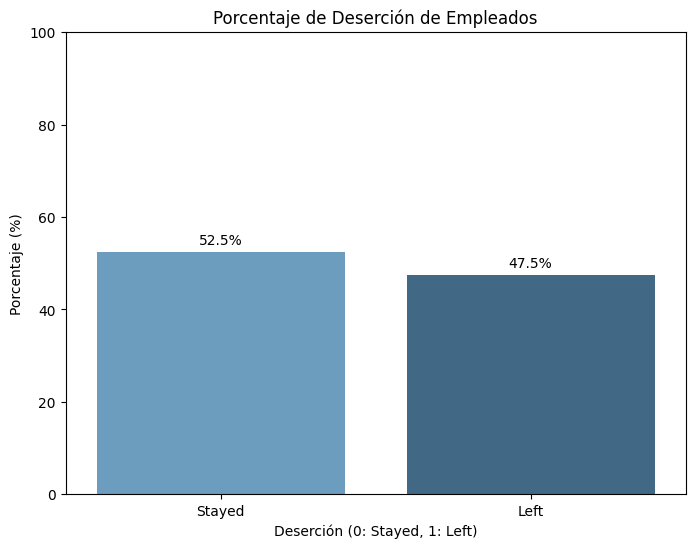

In [56]:
diccionario = {'Left' : 1 , 'Stayed' : 0}
binario = df['Deserción'].map(diccionario)

desercion_counts = binario.value_counts(normalize=True) * 100  
desercion_porcentajes = desercion_counts.sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")

plt.xlabel('Deserción (0: Stayed, 1: Left)')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Deserción de Empleados')
plt.ylim(0, 100) 
plt.xticks([0, 1], ['Stayed', 'Left'])

for i, value in enumerate(desercion_porcentajes):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')

Como se puede observar en la gráfica, el 47,5% de los empleados abandonan sus empresas. Esto no remarca una fuerte crisis de deserción pero si da a entender que poco menos de la mitad de los empleados se van a otras empresas o a trabajar por su propia cuenta, lo que nos generan las siguinetes preguntas:
* ¿Qué es lo que los motivó a desertar?
* ¿Cómo se puede evitar o al menos reducir el número de casos?

C:\Users\fchia\AppData\Local\Temp\ipykernel_16720\2640427003.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_16720\2640427003.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_16720\2640427003.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')
C:\Users\fchia\AppData\Local\Temp\ipykernel_16720\2640427003.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocato

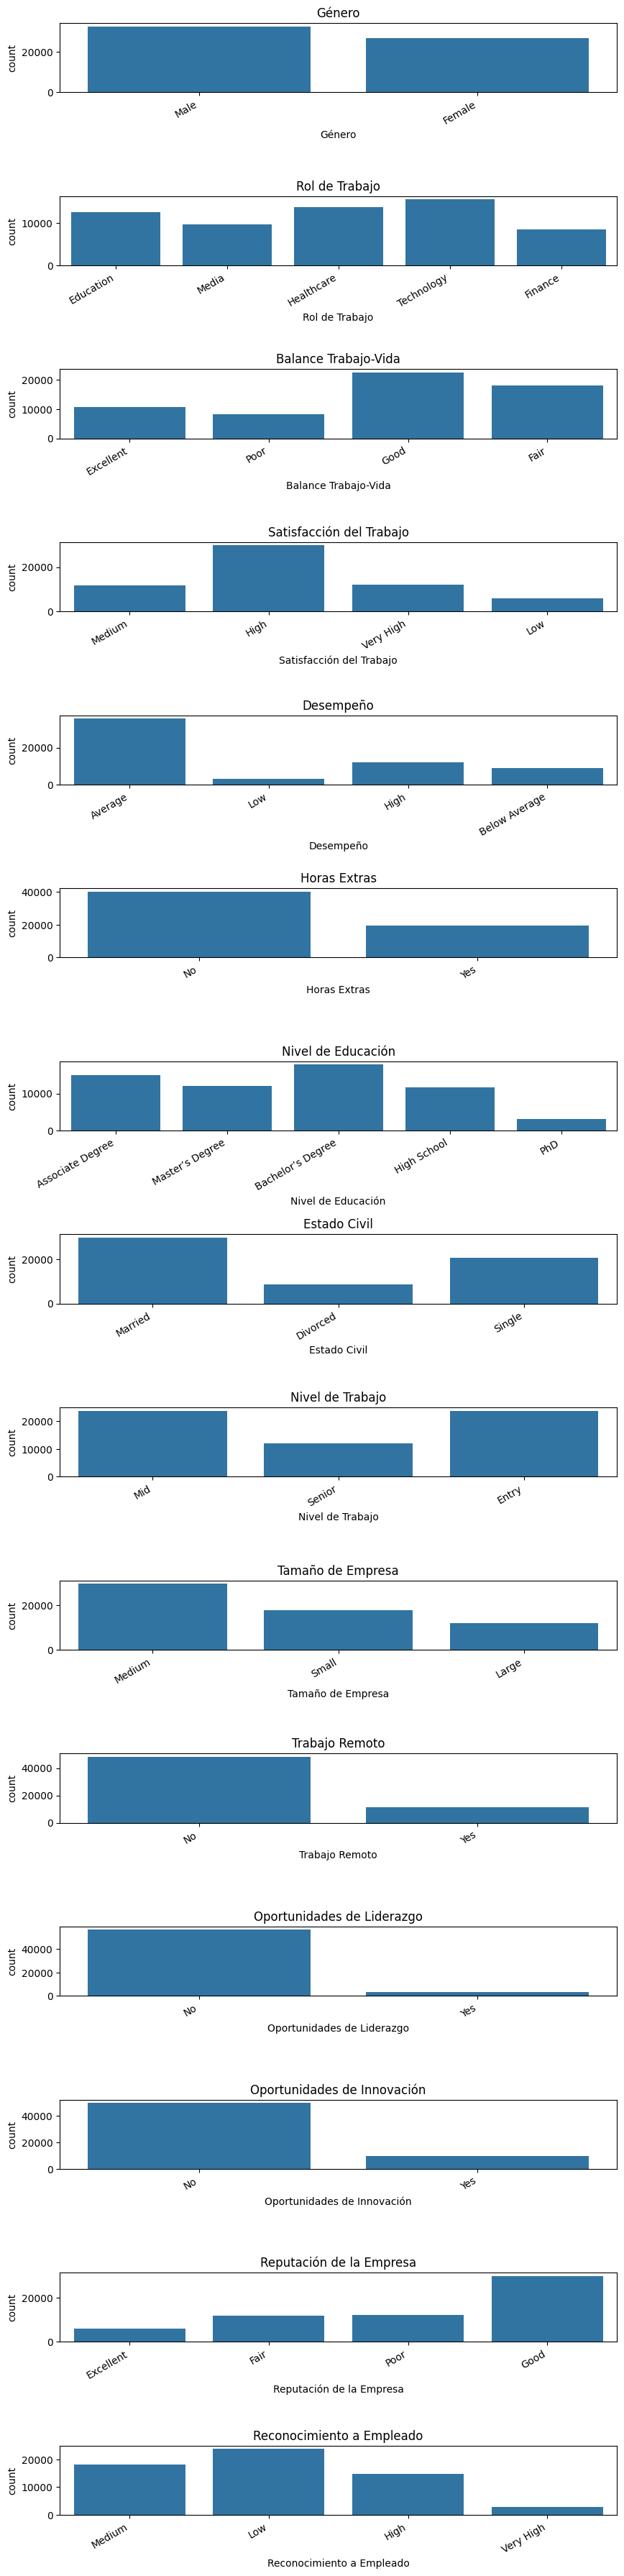

In [40]:
#Realizamos gráficos de barras para el análisis de cada variable tipo object de forma individual y determinar cuales son aquellas que son de nuestro
#interés para el análisis. 

col_cat = ['Género', 'Rol de Trabajo', 'Balance Trabajo-Vida', 'Satisfacción del Trabajo', 'Desempeño', 'Horas Extras', 'Nivel de Educación', 'Estado Civil', 
           'Nivel de Trabajo', 'Tamaño de Empresa', 'Trabajo Remoto', 'Oportunidades de Liderazgo', 'Oportunidades de Innovación', 'Reputación de la Empresa',
           'Reconocimiento a Empleado']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=1.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, ha='right')

## Observaciones:

In [49]:
df.describe()

,ID Empleado,Edad,Años en la Empresa,Ingreso Mensual,Número de Promociones,Distancia a Casa,Número de Dependientes,Tenencia de la Empresa
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


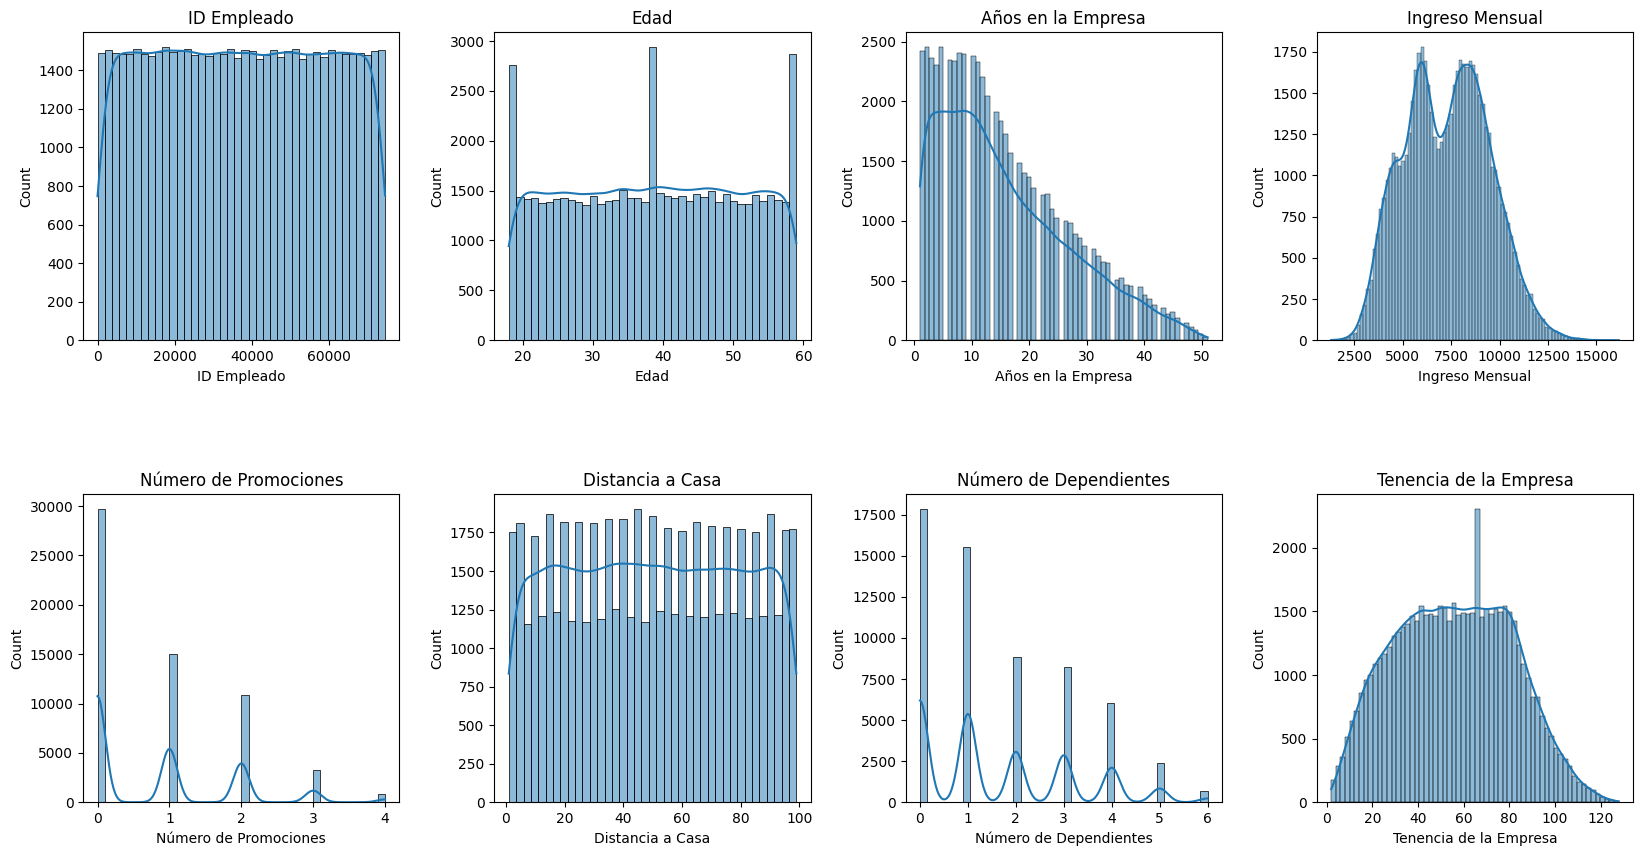

In [8]:
# Realizamos histogramas para el analisis y entendimiento de las variables numéricas con las que contamos.

col_num = ['ID Empleado', 'Edad', 'Años en la Empresa', 'Ingreso Mensual', 'Número de Promociones', 'Distancia a Casa', 'Número de Dependientes', 'Tenencia de la Empresa']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=df, ax=ax[i // 4, i % 4], kde = True)
    ax[i // 4, i % 4].set_title(col)
    ax[i // 4, i % 4].set_xlabel(col)

## Observaciones:
Las variables que nos podrían ayudar a predecir cuales son la o las causas de deserción en empleados son: 
* Edad
* Años en la Empresa
* Ingreso Mensual
* Número de Promociones 
* Distancia a Casa
* Balance Trabajo-Vida
* Satisfacción del Trabajo
* Horas Extras
* Estado Civil
* Tamaño de la Empresa
* Trabajo Remoto
* Oportunidades de Liderazgo
* Oportunidades de Innovación
* Reputación de la Empresa

Las otras variables si bien son utiles, no son determinante en la desición del empleado para dejar la empresa, en cambio, son factores a tener encuenta para la renovación de empleados o despidos de los mismos.

## Análisis porcentual de decerción en relación con otras variables

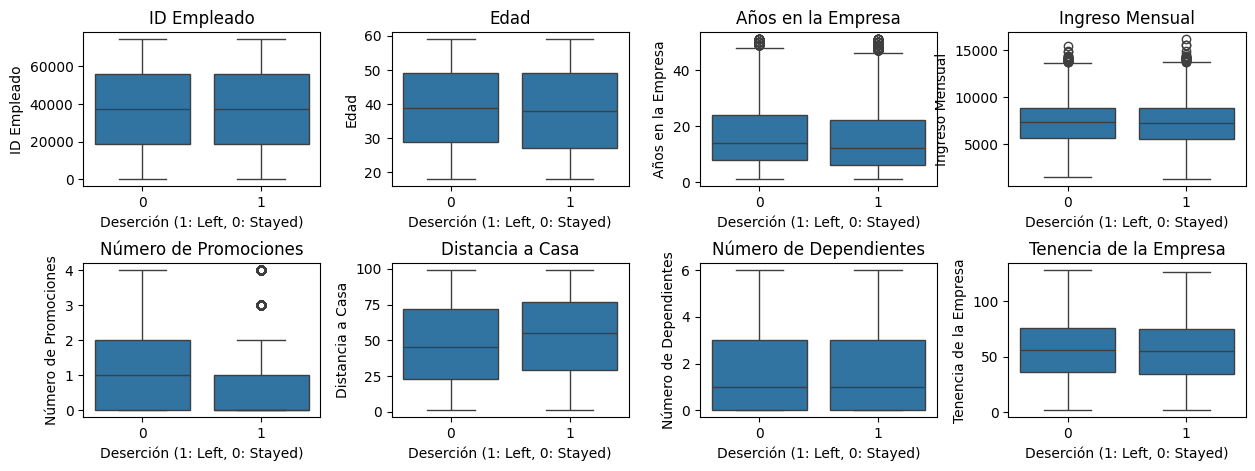

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(col_num):
    sns.boxplot(x=binario , y=col, data=df, ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xlabel('Deserción (1: Left, 0: Stayed)')
    ax[i // 4, i % 4].set_title(col) 